In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv('Patches.csv')

In [3]:
dataset

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,Other
1,2590,2,212,-6,390,6225,Other
2,2804,9,268,65,3180,6121,Other
3,2785,18,242,118,3090,6211,Other
4,2595,2,153,-1,391,6172,Other
...,...,...,...,...,...,...,...
15115,2607,23,258,7,660,1282,Other
15116,2603,19,633,195,618,1325,Other
15117,2492,25,365,117,335,1187,Other
15118,2487,28,218,101,242,932,Other


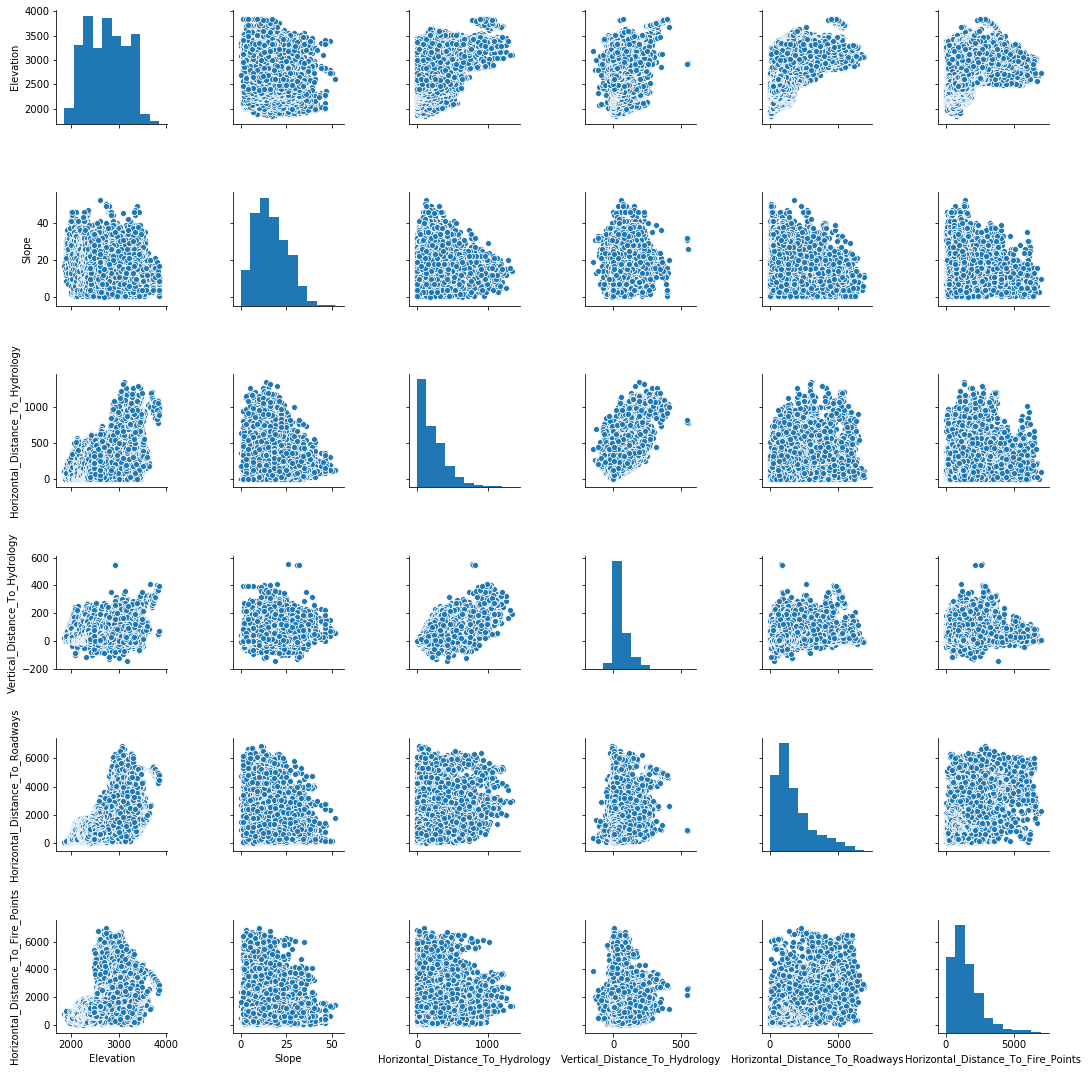

In [4]:
sns.pairplot(dataset)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
Elevation                             15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Tree                                  15120 non-null object
dtypes: int64(6), object(1)
memory usage: 827.0+ KB


In [6]:
dataset.describe

<bound method NDFrame.describe of        Elevation  Slope  Horizontal_Distance_To_Hydrology  \
0           2596      3                               258   
1           2590      2                               212   
2           2804      9                               268   
3           2785     18                               242   
4           2595      2                               153   
...          ...    ...                               ...   
15115       2607     23                               258   
15116       2603     19                               633   
15117       2492     25                               365   
15118       2487     28                               218   
15119       2475     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                   0                              510   
1                                  -6                              390   
2          

In [7]:
dataset.head()

,Elevation,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Tree
0,2596,3,258,0,510,6279,Other
1,2590,2,212,-6,390,6225,Other
2,2804,9,268,65,3180,6121,Other
3,2785,18,242,118,3090,6211,Other
4,2595,2,153,-1,391,6172,Other


In [8]:
print(dataset.shape)
print(dataset.info())
print(dataset.describe())


(15120, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 7 columns):
Elevation                             15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Tree                                  15120 non-null object
dtypes: int64(6), object(1)
memory usage: 827.0+ KB
None
          Elevation         Slope  Horizontal_Distance_To_Hydrology  \
count  15120.000000  15120.000000                      15120.000000   
mean    2749.322553     16.501587                        227.195701   
std      417.678187      8.453927                        210.075296   
min     1863.000000      0.000000                          0.000000   
25%     2376.000000     10.000000                      

In [9]:
# Converting Categorical features into Numerical features
converter = LabelEncoder()
dataset['Tree'] = converter.fit_transform(dataset['Tree'].astype(str))


In [10]:
print(dataset.shape)

(15120, 7)


In [11]:
dataset['Tree']

0        0
1        0
2        0
3        0
4        0
        ..
15115    0
15116    0
15117    0
15118    0
15119    0
Name: Tree, Length: 15120, dtype: int32

In [12]:
# Dividing dataset into label and feature sets
X = dataset.drop('Tree', axis = 1) # Features
Y = dataset['Tree'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(15120, 6)
(15120,)


In [13]:
# Normalizing numerical features so that each feature has mean 0 and variance 1
feature_scaler = StandardScaler()
X_scaled = feature_scaler.fit_transform(X)

Variance explained by each of the n_components:  [0.39655615 0.27480359]
Total variance explained by the n_components:  0.6713597407102032


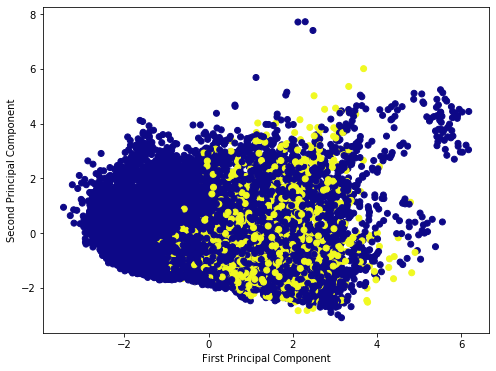

In [14]:
# Implementing PCA to visualize dataset
pca = PCA(n_components = 2)
pca.fit(X_scaled)
x_pca = pca.transform(X_scaled)
print("Variance explained by each of the n_components: ",pca.explained_variance_ratio_)
print("Total variance explained by the n_components: ",sum(pca.explained_variance_ratio_))

plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=Y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


In [15]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

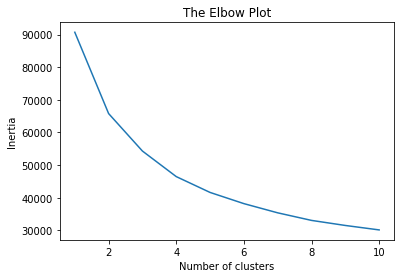

In [16]:
#Displaying the Elbow Plot    
plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()    


In [17]:
#Computing the Distance between the Points in the Elbow plot
derivates = []
for i in range(len(inertia)):
    derivates.append(inertia[i] - inertia[i-1])    
print(derivates)    

x = range(1, len(derivates)+1)

[60580.40490253949, -24924.75209372703, -11483.715336072572, -7832.074597838073, -4855.037625742261, -3427.5785107276315, -2820.9164729827535, -2320.782445345023, -1551.4118791976762, -1364.135940906468]


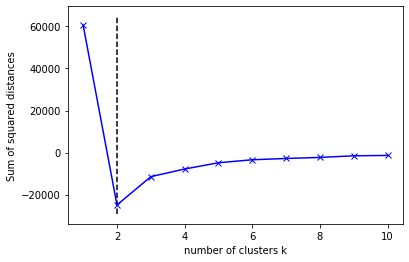

The Knee point is :  2


In [18]:
#Locating the Knee Point
from kneed import KneeLocator
kn = KneeLocator(x, derivates, curve='convex', direction='decreasing')
plt.xlabel('number of clusters k')
plt.ylabel('Sum of squared distances')
plt.plot(x, derivates, 'bx-')
plt.vlines(kn.knee, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()    
   

print("The Knee point is : ",
      kn.knee)    


Cluster Centers: 
 [[-0.63520999  0.32869308 -0.32418931 -0.05865825 -0.55331628 -0.47423596]
 [ 0.90964686 -0.47070202  0.46425244  0.08400103  0.79237169  0.67912542]]


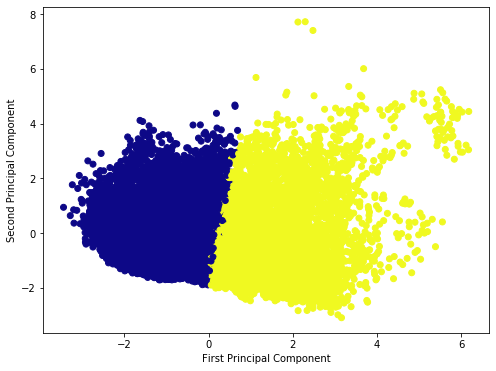

In [19]:
# Implementing K-Means CLustering on dataset and visualizing clusters
kmeans = KMeans(n_clusters = kn.knee)
kmeans.fit(X_scaled)
print("Cluster Centers: \n",kmeans.cluster_centers_)
plt.figure(figsize = (8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=kmeans.labels_, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

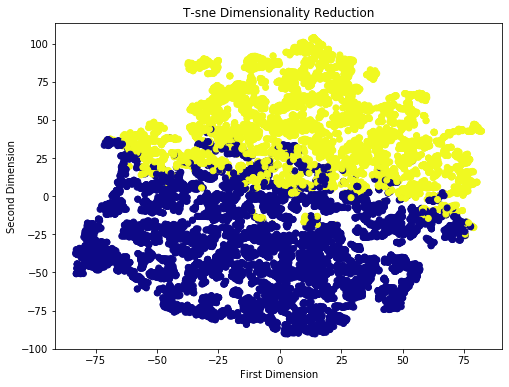

In [20]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,perplexity=30)
x_tsne=tsne.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
plt.scatter(x_tsne[:,0],x_tsne[:,1],c=kmeans.labels_,cmap='plasma')
plt.xlabel("First Dimension")
plt.ylabel('Second Dimension')
plt.title('T-sne Dimensionality Reduction')
plt.show()

In [21]:
Elevation = list(X['Elevation'])
Slope = list(X['Slope'])
Horizontal_Distance_To_Hydrology = list(X['Horizontal_Distance_To_Hydrology'])
Vertical_Distance_To_Hydrology = list(X['Vertical_Distance_To_Hydrology'])
Horizontal_Distance_To_Roadways = list(X['Horizontal_Distance_To_Roadways'])
Horizontal_Distance_To_Fire_Points = list(X['Horizontal_Distance_To_Fire_Points'])

In [22]:
import plotly.graph_objs as go
import plotly .offline as offline

data = [go.Scatter(x=x_tsne[:,0], y=x_tsne[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f'Elevation: {a},Slope: {b},Horizontal_Distance_To_Hydrology: {c}, Vertical_Distance_To_Hydrology: {d}, Horizontal_Distance_To_Roadways: {e},Horizontal_Distance_To_Fire_Points: {f}' for a,b,c,d,e,f in list(zip(Elevation,Slope , Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology ,Horizontal_Distance_To_Roadways ,Horizontal_Distance_To_Fire_Points))],
                                hoverinfo='text')]
layout = go.Layout(title = 't-SNE Dimensionality Reduction', width = 700, height = 700,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
offline.plot(fig,filename='t-SNE.html')


't-SNE.html'